In [1]:
from math import pi
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# List of model parameter set
def get_param(string):
    if string=='bacteria1':
        Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065
    elif string=='bacteria2':
        Du, Dv, F, k = 0.00014, 0.00006, 0.035, 0.065
    elif string=='coral':
        Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062
    elif string=='fingerprint':
        Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062
    elif string=='spirals':
        Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050
    elif string=='spirals_dense':
        Du, Dv, F, k = 0.00012, 0.00008, 0.020, 0.050
    elif string=='spirals_fast':
        Du, Dv, F, k = 0.00010, 0.00016, 0.020, 0.050
    elif string=='unstable':
        Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055
    elif string=='worms1':
        Du, Dv, F, k = 0.00016, 0.00008, 0.050, 0.065
    elif string=='worms2':
        Du, Dv, F, k = 0.00016, 0.00008, 0.054, 0.063
    elif string=='zebrafish':
        Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060
    return Du, Dv, F, k

In [3]:
# Plotting function
def plot_sol(U,V):
    fig = pyplot.figure(figsize=(16,10))
    pyplot.subplot(121)
    pyplot.imshow(U, cmap = cm.RdBu)
    pyplot.xticks([]), pyplot.yticks([]);
    pyplot.subplot(122)
    pyplot.imshow(V, cmap = cm.RdBu)
    pyplot.xticks([]), pyplot.yticks([]);
    return fig

In [4]:
# Laplacian function for interior nodes
def laplacian(y):
    laplacian = numpy.zeros((N,N))
    laplacian[1:-1,1:-1] = (y[:-2,1:-1] + y[2:,1:-1] + y[1:-1,:-2] + y[1:-1,2:] - 4*y[1:-1,1:-1])/h**2
    return laplacian

In [5]:
# Model parameter
Du, Dv, F, k = get_param('bacteria1')

# Initial condition load
uvinitial = numpy.load('./uvinitial.npz')
U0 = uvinitial['U']
V0 = uvinitial['V']

# Numerical parameters
N = 192
L = 5.
Tfinal = 8000.

# Driven numerical parameters
h = L/(N-1)
dt = .9*h**2/(4*max(Du,Dv))
nt = int(Tfinal/dt)

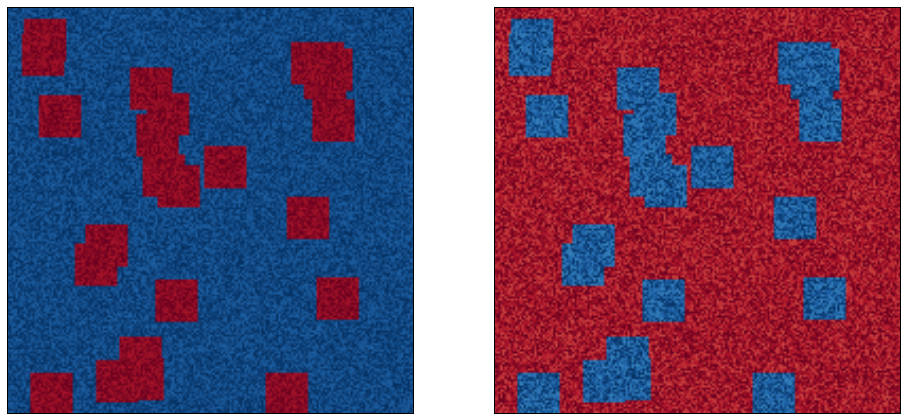

In [6]:
#Visualization of initial condition
fig = plot_sol(U0,V0)

In [7]:
def gray_scott(U0,V0,nt,dt,Du,Dv,F,k,ifplot,nplot):from IPython.display import Image
    U = numpy.copy(U0)
    V = numpy.copy(V0)
    for it in range(nt):
        dUdt = Du*laplacian(U) - U*V**2 + F*(1-U)
        dVdt = Dv*laplacian(V) + U*V**2 - (F+k)*V
        U = U + dt*dUdt
        V = V + dt*dVdt
        
        U[0,:] = U[1,:]
        U[-1,:] = U[-2,:]
        U[:,0] = U[:,1]
        U[:,-1] = U[:,-2]
        
        V[0,:] = V[1,:]
        V[-1,:] = V[-2,:]
        V[:,0] = V[:,1]
        V[:,-1] = V[:,-2]
        
        
        if ifplot and it%nplot == 0:
            fig = plot_sol(U,V)
            if it<10:
                fig.savefig('./grey_scott_fig/fig_0000'+str(it)+'.png',bbox_inches='tight')
            elif it<100:
                fig.savefig('./grey_scott_fig/fig_000'+str(it)+'.png',bbox_inches='tight')
            elif it<1000:
                fig.savefig('./grey_scott_fig/fig_00'+str(it)+'.png',bbox_inches='tight')
            elif it<10000:
                fig.savefig('./grey_scott_fig/fig_0'+str(it)+'.png',bbox_inches='tight')
            elif it<100000:
                fig.savefig('./grey_scott_fig/fig_'+str(it)+'.png',bbox_inches='tight')
            
            pyplot.close(fig)
            
    return U, V

IndentationError: unexpected indent (<ipython-input-7-7c5025b5ed00>, line 2)

In [ ]:
# Gray-Scott model call, the last two parameter are plotting options. 
# The second last is 0 (no saved plots, faster!) or 1 (saved plots)
# The last one is the number of time-step to skip between saved plots.
U,V = gray_scott(U0,V0,nt,dt,Du,Dv,F,k,0,100)

# Display the solution
fig = plot_sol(U,V)

In [ ]:
# Result post-processing
results_array = U[100,::40]
print('First number is','% 0.4f' % results_array[0])
print('Second number is','% 0.4f' % results_array[1])
print('Third number is','% 0.4f' % results_array[2])
print('Fourth number is','% 0.4f' % results_array[3])
print('Fifth number is','% 0.4f' % results_array[4])

### Here is an animated solution of the problem.

<img src="./grey_scott_fig/grey_scott_bact1.gif">